In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style = 'whitegrid', palette = 'Set2')

## Number 4

In [2]:
gdp_df_raw = pd.read_csv('../data/gdp_per_capita.csv', skipfooter = 2, engine = 'python')

In [3]:
gdp_df_raw.head(10)

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2019,2065.036398,NaN
1,Afghanistan,2018,2033.779002,NaN
2,Afghanistan,2017,2058.383832,NaN
3,Afghanistan,2016,2057.062164,NaN
4,Afghanistan,2015,2068.265904,NaN
5,Afghanistan,2014,2102.385234,NaN
6,Afghanistan,2013,2116.465454,NaN
7,Afghanistan,2012,2075.491747,NaN
8,Afghanistan,2011,1904.559799,NaN
9,Afghanistan,2010,1957.029338,NaN


In [4]:
gdp_df_raw.tail()

,Country or Area,Year,Value,Value Footnotes
6863,Zimbabwe,1994,3263.934978,NaN
6864,Zimbabwe,1993,3033.504852,NaN
6865,Zimbabwe,1992,3054.889178,NaN
6866,Zimbabwe,1991,3426.598094,NaN
6867,Zimbabwe,1990,3324.348171,NaN


## Number 5

In [5]:
gdp_df = (gdp_df_raw.drop(columns = 'Value Footnotes')
          .rename(columns = {'Country or Area' : 'Country', 'Value' : 'GDP_Per_Capita'},)
         )
gdp_df.head()

,Country,Year,GDP_Per_Capita
0,Afghanistan,2019,2065.036398
1,Afghanistan,2018,2033.779002
2,Afghanistan,2017,2058.383832
3,Afghanistan,2016,2057.062164
4,Afghanistan,2015,2068.265904


## Number 6

In [6]:
print(len(gdp_df.axes[0]))

6868


In [7]:
print(len(gdp_df.axes[1]))

3


In [8]:
gdp_df.dtypes

Country            object
Year                int64
GDP_Per_Capita    float64
dtype: object

The DataFrame has 3 columns and 6868 rows.
Country is and object, year is and,int and GDP is a float.

## Number 7

In [9]:
gdp_df['Year'].value_counts()

2017    238
2016    238
2015    238
2014    238
2013    238
2012    237
2011    237
2018    237
2010    236
2009    236
2008    235
2007    235
2006    235
2005    234
2004    234
2003    233
2002    233
2001    232
2000    231
2019    231
1999    224
1998    223
1997    223
1996    221
1995    221
1994    214
1993    212
1992    209
1991    208
1990    207
Name: Year, dtype: int64

 There is a different amount of countries represented per year.

## Number 8

In [10]:
gdp_df['Country'].nunique()

238

In [11]:
gdp_df['Country'].value_counts()

Lebanon                      30
Middle income                30
Morocco                      30
Mozambique                   30
Myanmar                      30
                             ..
Nauru                        16
Cayman Islands               13
Sint Maarten (Dutch part)    10
Turks and Caicos Islands      9
Djibouti                      7
Name: Country, Length: 238, dtype: int64

There are 238 countries and Djibouti is the least represented. why??

## Number 9

In [12]:
gdp_2014 = gdp_df[gdp_df['Year'] == 2014]
gdp_2014.head()

,Country,Year,GDP_Per_Capita
5,Afghanistan,2014,2102.385234
23,Albania,2014,11623.866679
53,Algeria,2014,11512.705405
83,Angola,2014,8239.828837
113,Antigua and Barbuda,2014,18104.241470


## Number 10

In [13]:
gdp_2014.describe()

,Year,GDP_Per_Capita
count,238.0,238.000000
mean,2014.0,19766.710348
std,0.0,20983.869623
min,2014.0,822.610458
25%,2014.0,4753.110934
50%,2014.0,12209.385755
75%,2014.0,26803.610474
max,2014.0,156514.133850


## Number 11

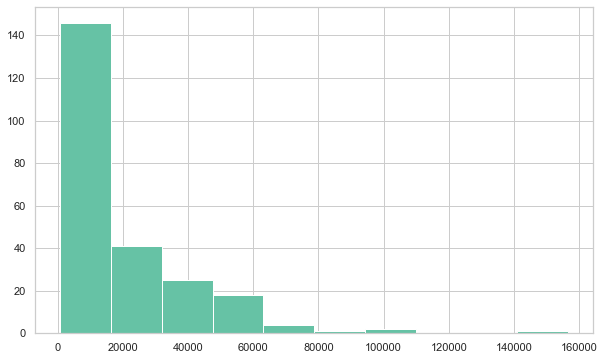

In [14]:
plt.figure(figsize = (10,6))
plt.hist(gdp_2014['GDP_Per_Capita'])
plt.show()

The shape is very right skweded

## Number 12

In [15]:
gdp_2014.sort_values(by = 'GDP_Per_Capita', ascending = False).head()

,Country,Year,GDP_Per_Capita
3721,"Macao SAR, China",2014,156514.133850
3691,Luxembourg,2014,108760.916030
5138,Qatar,2014,95578.416973
5464,Singapore,2014,87808.663157
561,Bermuda,2014,77361.104881


In [16]:
gdp_2014.sort_values(by = 'GDP_Per_Capita', ascending = False).tail()

,Country,Year,GDP_Per_Capita
4528,Niger,2014,1127.615541
1422,Dem. Rep. Congo,2014,1029.790785
3781,Malawi,2014,1027.208496
827,Burundi,2014,886.235777
1047,Central African Republic,2014,822.610458


## Number 13

In [17]:
gdp_pivoted = gdp_df[gdp_df['Year'].isin([1990, 2017])]
gdp_pivoted = gdp_pivoted.pivot_table(values = 'GDP_Per_Capita', index = 'Country', columns = 'Year').dropna(axis = 0)
gdp_pivoted

Year,1990,2017
Country,,
Albania,4842.734635,12811.759436
Algeria,8746.352901,11737.409353
Angola,5783.429064,7310.901738
Antigua and Barbuda,15459.551675,19840.076123
Arab World,9694.667544,14555.474921
...,...,...
Vanuatu,2888.309393,3116.645194
Vietnam,1673.249634,7155.745829
World,9680.269697,16253.385518


## Number 14

In [18]:
gdp_pivoted['Percent_Change'] = 100 * (gdp_pivoted[2017] / gdp_pivoted[1990]) / gdp_pivoted[1990]
gdp_pivoted.sort_values(by = 'Percent_Change').head()

Year,1990,2017,Percent_Change
Country,,,
United Arab Emirates,111454.360446,67183.626557,0.000541
Brunei,71230.862143,60995.681114,0.001202
Bermuda,65961.406278,81834.955874,0.001881
Switzerland,55420.151714,66910.573701,0.002179
Luxembourg,67857.540495,112666.769445,0.002447


## Number 15
No countries expierence a negative gdp.

## Number 16

In [19]:
gdp_pivoted.sort_values(by = 'Percent_Change', ascending = False).head(2)

Year,1990,2017,Percent_Change
Country,,,
Equatorial Guinea,1039.985049,22551.083246,2.085034
Myanmar,619.645144,4739.910118,1.234480


In [20]:
gdp_equ_guinea = gdp_df.loc[gdp_df['Country'] == 'Equatorial Guinea']
#gdp_equ_guinea = gdp_equ_guinea[gdp_equ_guinea['Year'] >= 1990 and gdp_equ_guinea['Year'] <= 2017]
gdp_equ_guinea = gdp_equ_guinea[gdp_equ_guinea['Year'] < 2018] 
#gdp_equ_guinea = gdp_equ_guinea[gdp_equ_guinea['Year'] > 1992]

In [21]:
gdp_myanmar = gdp_df.loc[gdp_df['Country'] == 'Myanmar']
gdp_myanmar = gdp_myanmar[gdp_myanmar['Year'] < 2018]

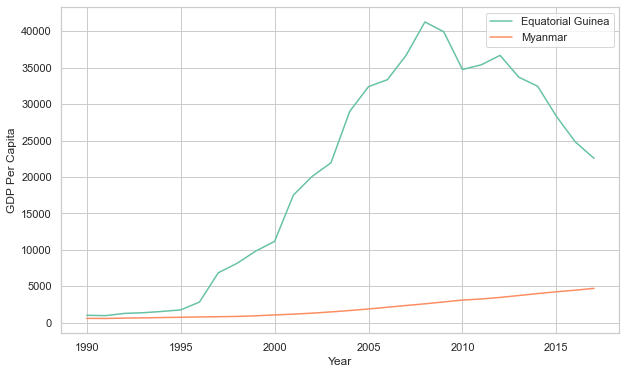

In [22]:
plt.figure(figsize = (10,6))
plt.plot('Year', 'GDP_Per_Capita', data = gdp_equ_guinea, label = 'Equatorial Guinea')
plt.plot('Year', 'GDP_Per_Capita', data = gdp_myanmar, label = 'Myanmar')
plt.xlabel('Year')
plt.ylabel('GDP Per Capita')
plt.legend()
plt.show()

## Number 17

In [23]:
continents = pd.read_csv('../data/continents.csv')

## Number 18

In [24]:
gdp_df = pd.merge(gdp_df, continents, how = 'inner', on = 'Country')

## Number 19

In [30]:
country_per_contin = gdp_df.groupby('Continent')[['Country']].nunique()
country_per_contin = country_per_contin.reset_index()

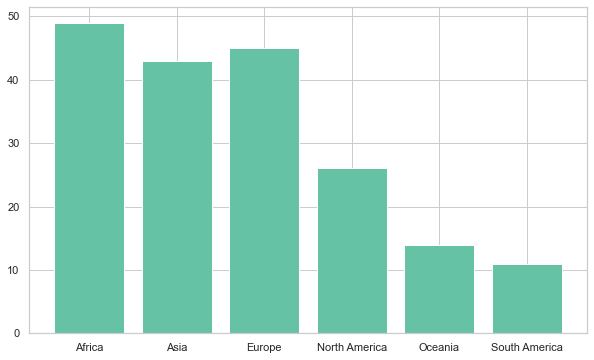

In [32]:
plt.figure(figsize = (10,6))
plt.bar(x = country_per_contin['Continent'], height = country_per_contin['Country'])
plt.show()

## Number 20

In [ ]:
gdp_2014_continent = gdp_df[gdp_df['Year'] == 2014]
#gdp_2014_continent = gdp_2014_continent.groupby('Continent')[['GDP_Per_Capita']]
gdp_2014_continent.head()

## Number 21

In [ ]:
life_expectancy = pd.read_csv('../data/life_expectancy.csv', skiprows = 4, engine = 'python')

## Number 22

In [ ]:
life_expectancy = life_expectancy.drop(columns = ['Country Code', 'Indicator Name', 'Indicator Code'])
life_expectancy.head()

In [ ]:
life_expectancy = pd.melt(life_expectancy, id_vars = ['Country Name'], value_vars = ['1960'])

In [ ]:
life_expectancy.head()